In [12]:
import pandas as pd

# Replace 'dataset.csv' with the actual path to your CSV file
file_path = 'dataset.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
df.fillna(df.median(), inplace=True)

# Display the DataFrame after filling missing values
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [14]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with the dataset
# X contains the features, and y contains the target variable
X = df.drop('target', axis=1)  # Assuming 'target' is the column you want to predict
y = df['target']

# Split the dataset into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (212, 13) (212,)
Test set shape: (91, 13) (91,)


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with 100 trees and a maximum depth of 10 for each tree
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# The model is now trained and ready for predictions


RandomForestClassifier(max_depth=10, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8132
Precision: 0.8367
Recall: 0.8200
F1 Score: 0.8283


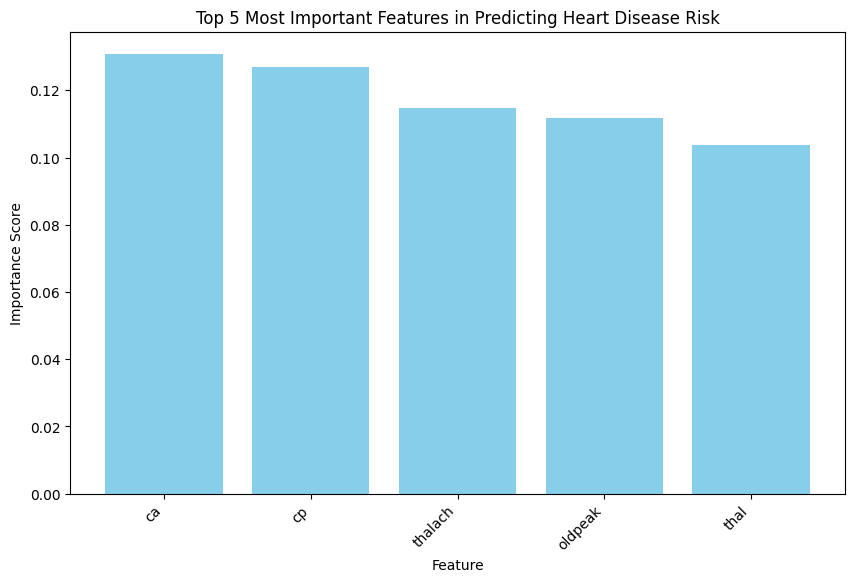

In [17]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 most important features
top_features = feature_importance_df.head(5)

# Visualize feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 5 Most Important Features in Predicting Heart Disease Risk')
plt.xticks(rotation=45, ha='right')
plt.show()


In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [5, 10, 15, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the performance of the best model on the test set
best_predictions = best_rf_model.predict(X_test)

# Print evaluation metrics
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)

print("\nPerformance of the Best Model:")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Precision: {best_precision:.4f}")
print(f"Recall: {best_recall:.4f}")
print(f"F1 Score: {best_f1:.4f}")


C:\Users\jaide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but RandomForestClassifier is expecting 13 features as input.

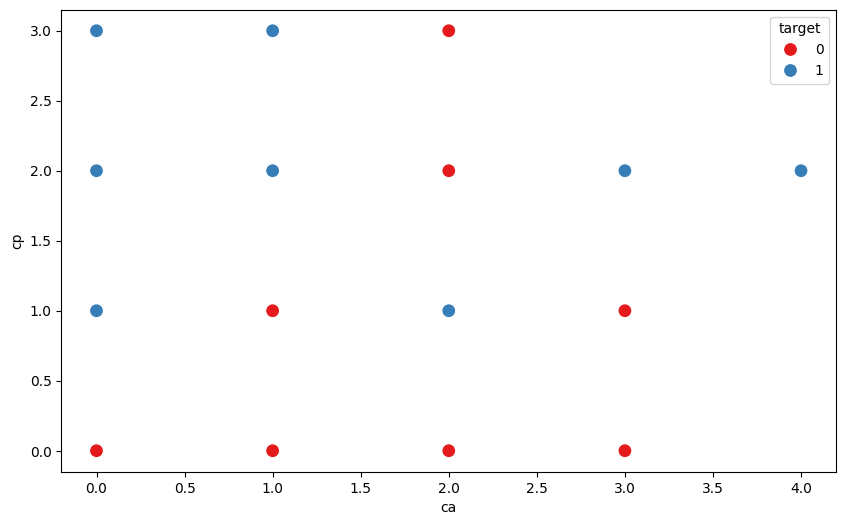

In [ ]:
import numpy as np
import seaborn as sns

# Assuming 'X_train' and 'y_train' are your training data
# Assuming 'best_rf_model' is the best Random Forest model from the grid search

# Extract the two most important features
important_features = top_features['Feature'].head(2).tolist()
X_subset = X_train[important_features]

# Plot decision boundaries
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_subset.iloc[:, 0], y=X_subset.iloc[:, 1], hue=y_train, palette='Set1', marker='o', s=100)

# Create a meshgrid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X_subset.iloc[:, 0].min() - 1, X_subset.iloc[:, 0].max() + 1, 100),
                     np.linspace(X_subset.iloc[:, 1].min() - 1, X_subset.iloc[:, 1].max() + 1, 100))
Z = best_rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel(important_features[0])
plt.ylabel(important_features[1])
plt.title('Decision Boundaries of Random Forest Classifier')

plt.legend(title='Heart Disease Risk', loc='upper right')
plt.show()
